In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Regresi Non-Iteratif ($ A^{T}A \hat{x} = A^{T}b $)

Misalnya kita punya pasangan x & y yang memenuhi hubungan $ y = m x + c $

In [2]:
x = np.array([3,4,5,6,7,8,9,10,11])
y= np.array([5.6, 8.1, 10.5, 10.9, 15.7, 16.2, 18.4, 20.1, 23.5])

Dengan metode Alin, kita dapat menyelesaikan persamaan tadi dengan Metode Least Square dengan memecahkan persamaan

$\begin{bmatrix}
x_{1} & 1 \\
x_{2} & 1 \\
... &  ...\\
x_{n} & 1
\end{bmatrix} \begin{bmatrix}
\hat{m} \\
\hat{c}
\end{bmatrix}  = \begin{bmatrix}
y_{1}  \\
y_{2}  \\
... \\
y_{n} 
\end{bmatrix}$

In [3]:
def least_square_solve(x,y):
    A= np.vstack([x,np.ones(len(x))]).transpose()
    print("Left Matrix A is \n"+ str(A))
    m,c = np.linalg.lstsq(A,y, rcond=None)[0]
    print("Model is y = %f x + %f"%(m,c))
    return (m,c)

In [4]:
m,c = least_square_solve(x,y)

Left Matrix A is 
[[ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]
 [11.  1.]]
Model is y = 2.145000 x + -0.681667


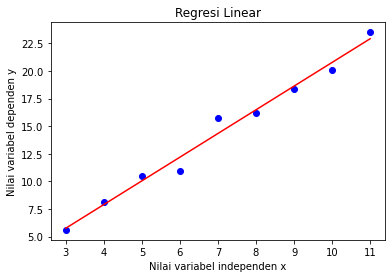

In [5]:
plt.plot(x,y, 'bo')
plt.title("Regresi Linear")
plt.xlabel("Nilai variabel independen x")
plt.ylabel("Nilai variabel dependen y")
plt.plot(x, m*x+c,'r-')
plt.show()

## Regresi Iteratif (Gradient Descent)

Dengan data yang sama

In [6]:
x = np.array([3,4,5,6,7,8,9,10,11])
y= np.array([5.6, 8.1, 10.5, 10.9, 15.7, 16.2, 18.4, 20.1, 23.5])

Seperti yang kita tahu, rerata jumlahan simpangan atau error dapat dituliskan sepagai $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}-y_{i})^2 = \frac{1}{n} \sum_{i=1}^{n} (\hat{m}x_{i}+\hat{c}-y_{i})^2 $$ 

- Jika terdapat perbedaan bentuk persamaan, cukup ubah mx+c dengan bentuk persamaan yang diinginkan

MSE terkecil ditemukan saat turunan MSE terhadap variabel m atau c nya adalah 0. Untuk mencari rumus regresi linear, kita berusaha agar MSE bernilai sekecil mungkin. Untuk itu, kita dapat menggunakan persamaan

$$ \hat{c} = \hat{c} - \alpha\frac{\partial }{\partial \hat{c}} MSE 
= \hat{c} - \alpha\frac{\partial }{\partial \hat{c}} \frac{1}{n} \sum_{i=1}^{n} (\hat{y}-y_{i})^2 $$ 
$$ \hat{c}= \hat{c} - 2\alpha \frac{1}{n} \sum_{i=1}^{n} (\hat{m}x_{i}+\hat{c}-y_{i}) $$

$$ \hat{m} = \hat{m} - \alpha\frac{\partial }{\partial \hat{m}} MSE = \hat{m} - \alpha\frac{\partial }{\partial \hat{c}} \frac{1}{n} \sum_{i=1}^{n} (\hat{y}-y_{i})^2 $$

$$ \hat{m}= \hat{m} - 2\alpha \frac{1}{n} \sum_{i=1}^{n} (\hat{m}x_{i}+\hat{c}-y_{i}) x_{i} $$

dengan $ 2\alpha$ biasa disebut learning ratenya

Secara umum, untuk bentuk persamaan yang berbeda, persamaan $ y = \hat{m}x+\hat{c} $ dapat digeneralisir menjadi

$$ y = a_{0} + a_{1} x_1 + a_{2} x_2 + ... + a_{n} x_n  $$

dan rumus regresi linear menjadi
$$  a_{j} = a_{j} - \alpha\frac{\partial }{\partial \theta_{j}} \frac{1}{n} \sum_{i=1}^{n} (\hat{y}-y_{i})^2 $$

dengan
$$ \hat{y} = a_{0} + a_{1} x_{i1} + a_{2} x_{i2} + ... + a_{n} x_{in}  $$
untuk learning rate $\alpha$

- Catatan : MSE hanyalah salah satu jenis cost function. Ada banyak Cost Function yang bisa dicoba untuk menyelesaikan permasalahan yang beragam. Pada kasus MSE, Cost Function adalah

$$ J(\theta) =  \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}-y_{i})^2 $$

- $ x_1 , x_2,...,x_n $ tidak harus berupa basis polinomial, bisa juga basis lain, seperti $ln(x) , e^{j\omega x} (Deret \ Fourier), e^{x^2} (Fungsi\ Gauss) $ dan sebagainya sesuai perkiraan bentuk di awal 

In [7]:
def GradDescent(x,y,alpha=0.02,epsilon=1e-10):
    i=0
    n = len(x)
    m = 1
    c = 1 #Gunakan nilai awal m & c = 1
    cost = (1/(2*n)) * np.sum((m*x + c - y)**2)
    delta = 1
    while delta>epsilon and i<10000:
        i += 1
        c =  c- alpha/n * np.sum((c+m*x-y))
        m = m - alpha/n * np.sum(x*(c+m*x-y))
        prev_cost = cost
        cost = (1/(2*n)) * np.sum((m*x + c - y)**2)
        delta = abs(cost-prev_cost)
        #print("Model persamaan saat ini adalah y = %.4f x + %.4f dengan cost %.4f"%(m,c,cost))
        if cost-prev_cost>0 :
            print("Fungsi cost mengalami kenaikan. Coba kurangi alpha")
            return (None, None)
    print("Terselesaikan dalam %d iterasi"%i)
    print("Model persamaan akhir adalah y = %.4f x + %.4f dengan cost %.4f"%(m,c,cost))
    return (m,c)

In [8]:
m,c = GradDescent(x,y)

Terselesaikan dalam 3341 iterasi
Model persamaan akhir adalah y = 2.1449 x + -0.6811 dengan cost 0.2621


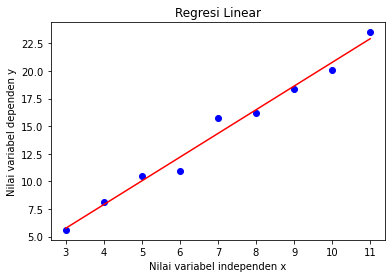

In [9]:
plt.plot(x,y, 'bo')
plt.title("Regresi Linear")
plt.xlabel("Nilai variabel independen x")
plt.ylabel("Nilai variabel dependen y")
plt.plot(x, m*x+c,'r-')
plt.show()